In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [14]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------------------------- 323.6/323.6 kB 10.1 MB/s eta 0:00:00
   

In [31]:
pip install pingouin


  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   -------------- ------------------------- 71.7/198.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 198.9/198.9 kB 2.4 MB/s eta 0:00:00


In [2]:
import pandas as pd

file_path = r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv'
data = pd.read_csv(file_path)

print(data.head())

               X             Y  FID                datetime siteid  tc_cfu  \
0 -292611.743913  6.698558e+06    1  2013/09/12 10:18:00+01     r4       0   
1 -284290.031922  6.696286e+06    2  2013/09/12 11:51:00+01     r8       0   
2 -284290.031922  6.696286e+06    3  2013/10/14 11:15:00+01     r8       0   
3 -283531.517179  6.702055e+06    4  2013/10/14 11:40:00+01    r17       0   
4 -293739.717388  6.708986e+06    5  2013/10/14 13:00:00+01     r3   20100   

   ec_cfu  tc_mpn  ec_mpn  p_ecc_cfu  ...  fcoliforms  salmonella  bod  cod  \
0       0       0       0          0  ...           0           0    0    0   
1       0       0       0          0  ...           0           0    0    0   
2       0       0       0          0  ...           0           0    0    0   
3       0       0       0          0  ...           0           0    0    0   
4       0       0       0          0  ...        6200           0    0    0   

   sussolids    id         sitename              river  

# Step 1 : Data Cleaning and Preprocessing

In [5]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [6]:
# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [8]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Initialize the encoder
encoder = LabelEncoder()

# Encode the categorical columns
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [9]:
# Save the cleaned data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

In [10]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('cleaned_data.csv')

# Display the first few rows of the cleaned dataset
print(data.head())

          X         Y       FID  datetime  siteid    tc_cfu  ec_cfu  tc_mpn  \
0  0.306813  0.239483  0.000000      2424      32  0.000000     0.0     0.0   
1  0.863055  0.116964  0.000086      2429      40  0.000000     0.0     0.0   
2  0.863055  0.116964  0.000173      2460      40  0.000000     0.0     0.0   
3  0.913756  0.428057  0.000259      2462      26  0.000000     0.0     0.0   
4  0.231417  0.801898  0.000345      2464      29  0.000831     0.0     0.0   

   ec_mpn  p_ecc_cfu  ...  fcoliforms  salmonella  bod  cod  sussolids  \
0     0.0        0.0  ...     0.00000         0.0  0.0  0.0        0.0   
1     0.0        0.0  ...     0.00000         0.0  0.0  0.0        0.0   
2     0.0        0.0  ...     0.00000         0.0  0.0  0.0        0.0   
3     0.0        0.0  ...     0.00000         0.0  0.0  0.0        0.0   
4     0.0        0.0  ...     0.00155         0.0  0.0  0.0        0.0   

         id  sitename  river  total_coli  total_ecol  
0  0.795776        32    

# Exploaratory Data Analysis

# Step 1: Descriptive Statistics

In [13]:
# Generate descriptive statistics for numerical columns
desc_stats = data.describe()
print(desc_stats)

                  X             Y           FID      datetime        siteid  \
count  11588.000000  11588.000000  11588.000000  11588.000000  11588.000000   
mean       0.569244      0.415176      0.500000   1758.176044     15.374871   
std        0.196807      0.185693      0.288713   1719.472035     11.944774   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.457459      0.357329      0.250000    429.000000      6.000000   
50%        0.545654      0.380366      0.500000    831.000000     11.000000   
75%        0.609099      0.422069      0.750000   3103.250000     24.000000   
max        1.000000      1.000000      1.000000   5637.000000     42.000000   

             tc_cfu        ec_cfu        tc_mpn        ec_mpn     p_ecc_cfu  \
count  11588.000000  11588.000000  11588.000000  11588.000000  11588.000000   
mean       0.001950      0.004602      0.004386      0.002641      0.002845   
std        0.015158      0.021130      0.037754    

# Step 2: Temporal Analysis

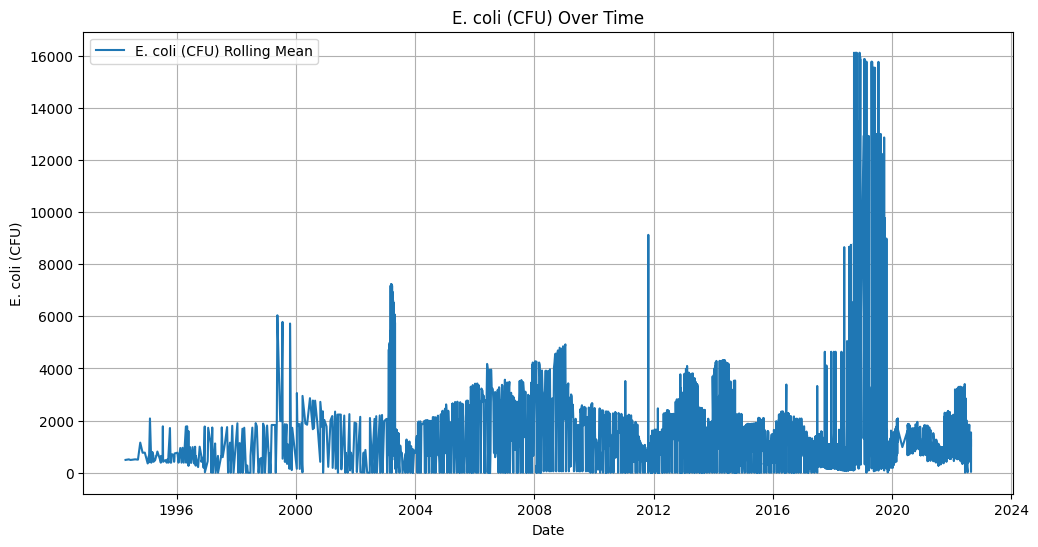

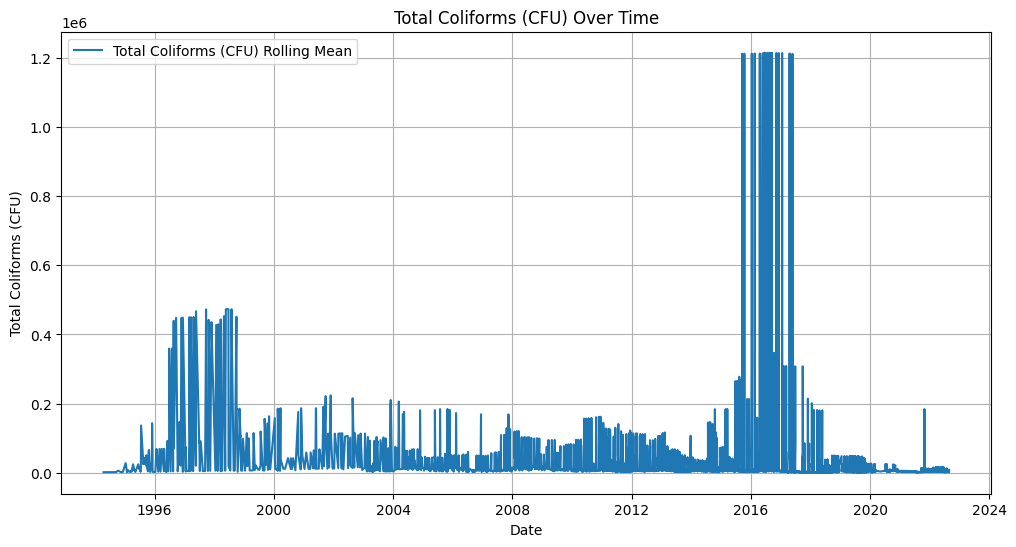

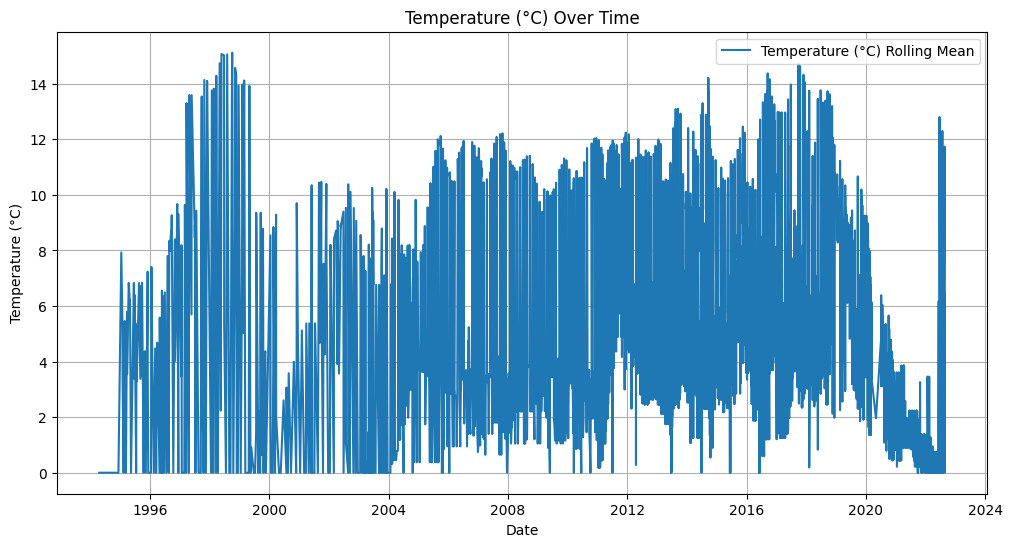

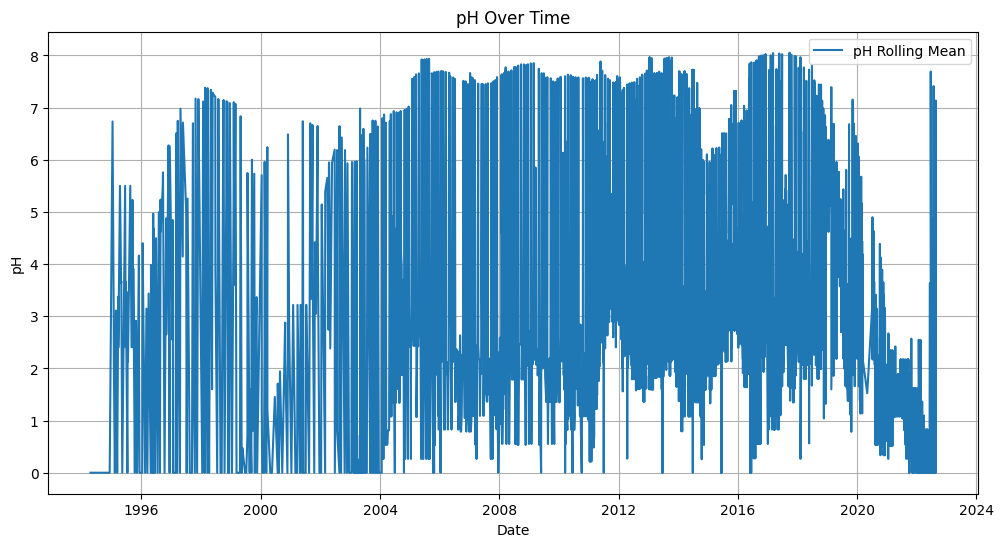

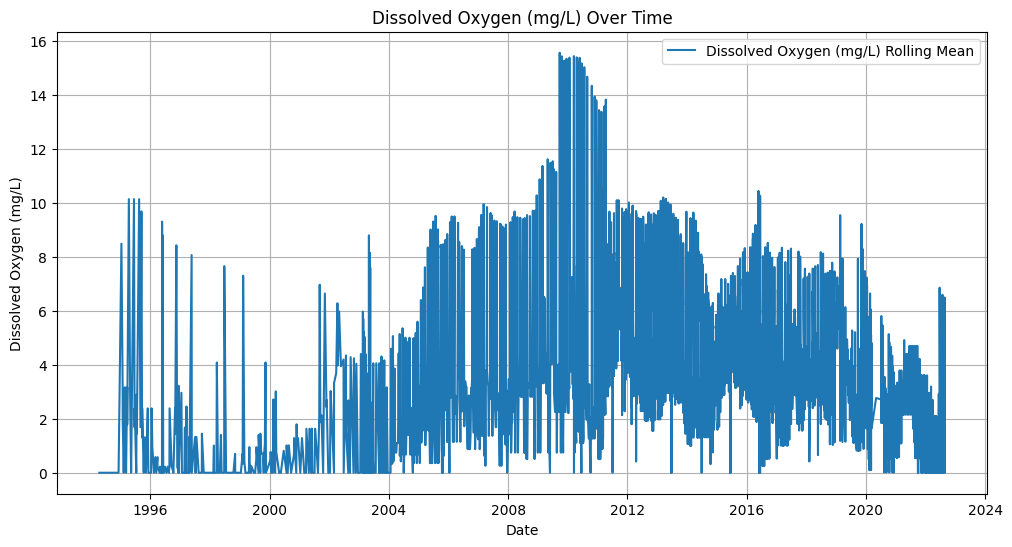

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv'
data = pd.read_csv(file_path)

# Convert datetime column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Remove duplicates in datetime column
data = data.drop_duplicates(subset='datetime')

# Ensure datetime is the index
data = data.set_index('datetime')

# Rolling mean for smoother visualization
data['ec_cfu_rolling'] = data['ec_cfu'].rolling(window=30).mean()
data['tc_cfu_rolling'] = data['tc_cfu'].rolling(window=30).mean()
data['temp_rolling'] = data['temp'].rolling(window=30).mean()
data['ph_rolling'] = data['ph'].rolling(window=30).mean()
data['do_rolling'] = data['do'].rolling(window=30).mean()

# List of attributes to plot
key_attributes = ['ec_cfu', 'tc_cfu', 'temp', 'ph', 'do']

# Corresponding full names for the attributes
attribute_names = {
    'ec_cfu': 'E. coli (CFU)',
    'tc_cfu': 'Total Coliforms (CFU)',
    'temp': 'Temperature (°C)',
    'ph': 'pH',
    'do': 'Dissolved Oxygen (mg/L)'
}

# Plotting each attribute
for attribute in key_attributes:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=data.index, y=f'{attribute}_rolling', data=data, label=f'{attribute_names[attribute]} Rolling Mean')
    plt.title(f'{attribute_names[attribute]} Over Time')
    plt.xlabel('Date')
    plt.ylabel(attribute_names[attribute])
    plt.legend()
    plt.grid(True)
    plt.show()

# Ensure datetime is the index and remove duplicates
data = data.reset_index().drop_duplicates(subset='datetime').set_index('datetime')

# Resample only numeric columns for down-sampled plot
numeric_cols = data.select_dtypes(include=['number']).columns
sampled_data = data[numeric_cols].resample('M').mean()

# Time series plot for E. coli (down-sampled)
plt.figure(figsize=(12, 6))
sns.lineplot(x=sampled_data.index, y='ec_cfu', data=sampled_data, label='E. coli (CFU)')
plt.title('E. coli (CFU) Over Time (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('E. coli (CFU)')
plt.legend()
plt.grid(True)
plt.show()

# Time series plot for Dissolved Oxygen (down-sampled)
plt.figure(figsize=(12, 6))
sns.lineplot(x=sampled_data.index, y='do', data=sampled_data, label='Dissolved Oxygen')
plt.title('Dissolved Oxygen Over Time (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend()
plt.grid(True)
plt.show()


Interpretation of the Temporal Analysis Graphs:

E. coli (CFU) Over Time

Observation: The levels of E. coli show a significant increase around the year 2020. Prior to this period, there are fluctuations with noticeable spikes around the early 2000s and mid-2010s.

Interpretation: The peaks in E. coli concentration could indicate events of contamination or increased agricultural runoff. The sharp rise around 2020 may point to a major contamination event or changes in land use, water treatment, or environmental regulations.

Total Coliforms (CFU) Over Time

Observation: The concentration of total coliforms also increases sharply around 2015 to 2018, similar to E. coli. Before this period, the levels are relatively low with occasional spikes.

Interpretation: This pattern suggests a correlation between E. coli and total coliforms, indicating that sources contributing to E. coli contamination might also be affecting total coliform levels. The rise around 2015-2018 warrants further investigation into environmental or anthropogenic activities during that period.

Temperature (°C) Over Time

Observation: The temperature data shows a clear seasonal pattern with peaks and troughs corresponding to the seasonal changes. There is no significant long-term trend observable from the data.

Interpretation: The seasonal variation in temperature is expected and reflects the natural climatic conditions. Consistent monitoring of temperature is crucial as it affects the solubility of oxygen and the metabolism of aquatic organisms.

pH Over Time
Observation: The pH values display high variability with periods of very low pH, particularly before the mid-2000s. There is a slightly more stable pattern observed in recent years.

Interpretation: The pH variability indicates potential episodes of acidification which could be due to industrial discharge, acid rain, or agricultural runoff. The stabilization in recent years could be attributed to improved water management practices or regulations.

Key Insights

Seasonal Patterns: The temperature data clearly shows seasonal variations which is typical for such environmental parameters.
Spikes and Anomalies: Significant spikes in E. coli and total coliforms concentrations highlight potential contamination events. The sharp rise around 2020 (E. coli) and 2015-2018 (total coliforms) are particularly noteworthy.
Potential Correlation: Similar patterns observed in E. coli and total coliforms suggest common sources or contributing factors to their concentrations.
pH Fluctuations: The variability in pH values points to episodes of environmental stress or pollution which could have detrimental effects on aquatic life.

# Step 3: Spatial Distribution of Water Quality Parameters

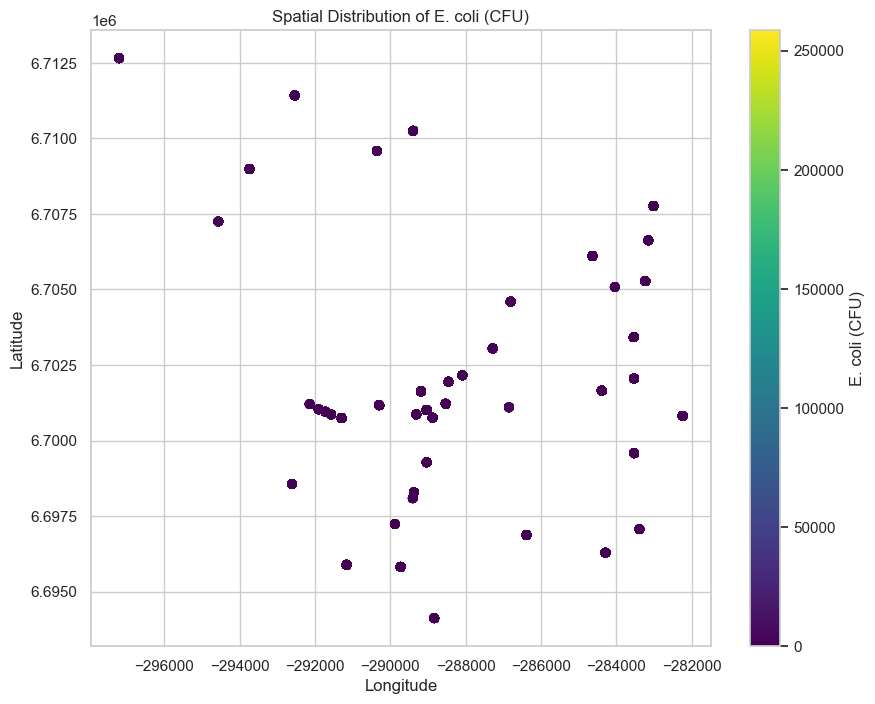

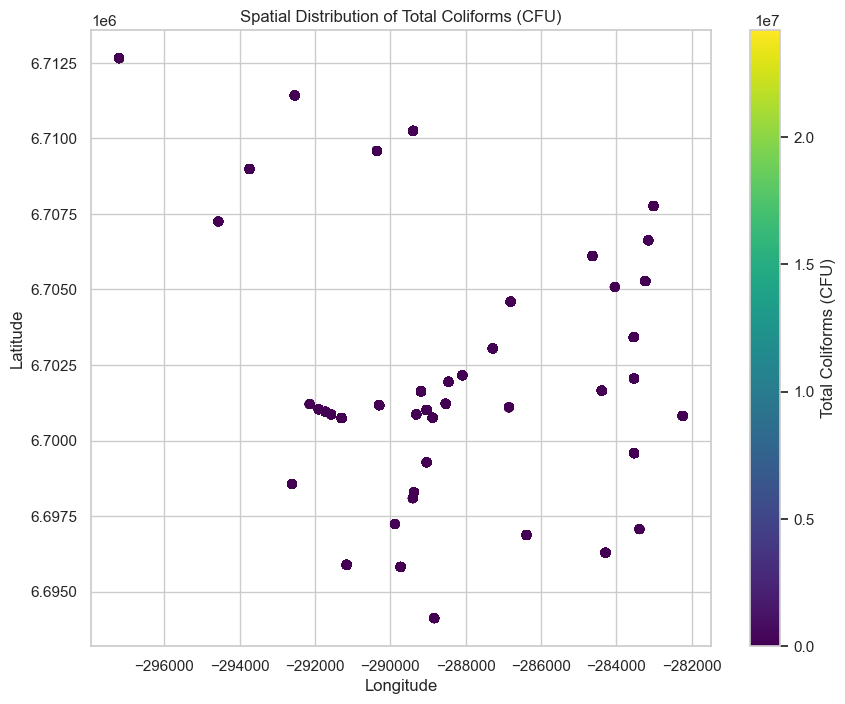

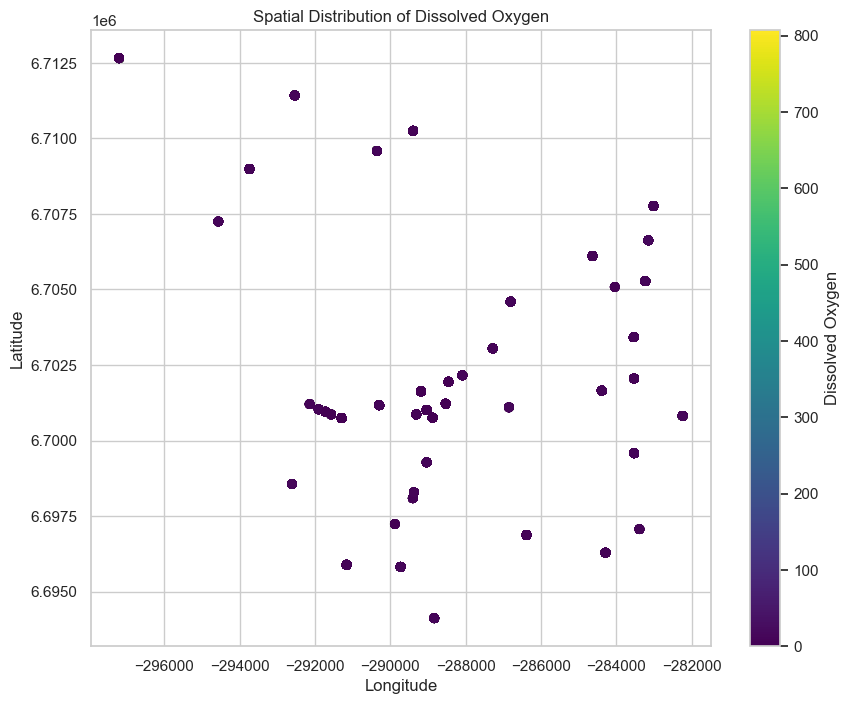

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the grid style is set
sns.set(style="whitegrid")

# Updated attribute names for titles
attribute_names = {
    'ec_cfu': 'E. coli (CFU)',
    'tc_cfu': 'Total Coliforms (CFU)',
    'do': 'Dissolved Oxygen',
    'temp': 'Temperature',
    'ph': 'pH'
}

# Sample plots with full names and gridlines
plt.figure(figsize=(10, 8))
plt.scatter(data['X'], data['Y'], c=data['ec_cfu'], cmap='viridis')
plt.colorbar(label='E. coli (CFU)')
plt.title('Spatial Distribution of E. coli (CFU)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(data['X'], data['Y'], c=data['tc_cfu'], cmap='viridis')
plt.colorbar(label='Total Coliforms (CFU)')
plt.title('Spatial Distribution of Total Coliforms (CFU)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(data['X'], data['Y'], c=data['do'], cmap='viridis')
plt.colorbar(label='Dissolved Oxygen')
plt.title('Spatial Distribution of Dissolved Oxygen')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Interpretation of Spatial Distribution Graphs

1. Spatial Distribution of E. coli (CFU)
Observation: The graph displays the spatial distribution of E. coli (CFU) across different geographical locations.
High Concentrations: Areas with higher concentrations of E. coli are indicated by points with a color closer to yellow on the color scale.
Clusters: There are several clusters with high E. coli counts, particularly around the coordinates of -284000 to -282000 longitude and 6.705 to 6.712 latitude.
Potential Pollution Sources: These clusters may indicate potential sources of pollution or areas where water quality is severely compromised. Further investigation could reveal if these locations are near industrial sites, sewage discharge points, or urban runoff areas.

2. Spatial Distribution of Total Coliforms (CFU)
Observation: This graph shows the spatial distribution of total coliforms (CFU) across the study area.
High Concentrations: Similar to the E. coli distribution, high concentrations of total coliforms are indicated by yellow points.
Clusters: High concentrations of total coliforms are spread across multiple locations with significant clusters around the same areas as E. coli.
Indicator of Water Quality: Total coliforms are a broader indicator of water quality and contamination. Areas with high coliform counts may require targeted interventions to improve water safety and public health.

3. Spatial Distribution of Dissolved Oxygen
Observation: This graph depicts the distribution of dissolved oxygen levels across different locations.
Higher Oxygen Levels: Points closer to yellow indicate higher levels of dissolved oxygen.
Variation in Oxygen Levels: Dissolved oxygen levels vary significantly across the study area, with some areas showing significantly lower levels (closer to purple).
Water Quality: Dissolved oxygen is crucial for aquatic life. Areas with low dissolved oxygen levels might indicate pollution, eutrophication, or other ecological problems. High levels of dissolved oxygen, on the other hand, are indicative of healthier water bodies.

Summary and Implications
Pollution Hotspots: The spatial distribution graphs for E. coli and total coliforms highlight specific areas that are likely hotspots of pollution. These areas need more focused monitoring and potentially, remedial actions.
Ecological Health: The dissolved oxygen distribution provides insight into the ecological health of different water bodies. Areas with low dissolved oxygen levels may be at risk and could impact aquatic life.
Further Analysis: These spatial analyses can guide further investigations to identify sources of contamination, plan remediation efforts, and assess the impact of different land use practices on water quality. This information is crucial for developing targeted water management strategies and improving overall water quality in the region.

# Step 4: Correlation Analysis of Water Quality Variables

Spearman Correlation Matrix:
                    X         Y       FID    tc_cfu    ec_cfu    tc_mpn  \
X           1.000000  0.234563  0.007794  0.035733 -0.096412 -0.011470   
Y           0.234563  1.000000 -0.001808 -0.045313 -0.054902  0.005736   
FID         0.007794 -0.001808  1.000000 -0.012376 -0.092079  0.008003   
tc_cfu      0.035733 -0.045313 -0.012376  1.000000  0.122112 -0.253969   
ec_cfu     -0.096412 -0.054902 -0.092079  0.122112  1.000000 -0.165467   
tc_mpn     -0.011470  0.005736  0.008003 -0.253969 -0.165467  1.000000   
ec_mpn     -0.011031  0.005891  0.007093 -0.253981 -0.164945  0.998455   
p_ecc_cfu  -0.054022 -0.010711 -0.000443 -0.118971  0.283239 -0.063934   
fs_cfu     -0.036525 -0.049946 -0.075496  0.083648  0.318155 -0.063686   
temp        0.144861  0.121512  0.059922  0.141736 -0.485232 -0.072536   
ph          0.187672  0.113279  0.067749  0.108442 -0.462437 -0.051533   
cond        0.041015  0.109277  0.051863  0.148429 -0.483629 -0.051562   
do      

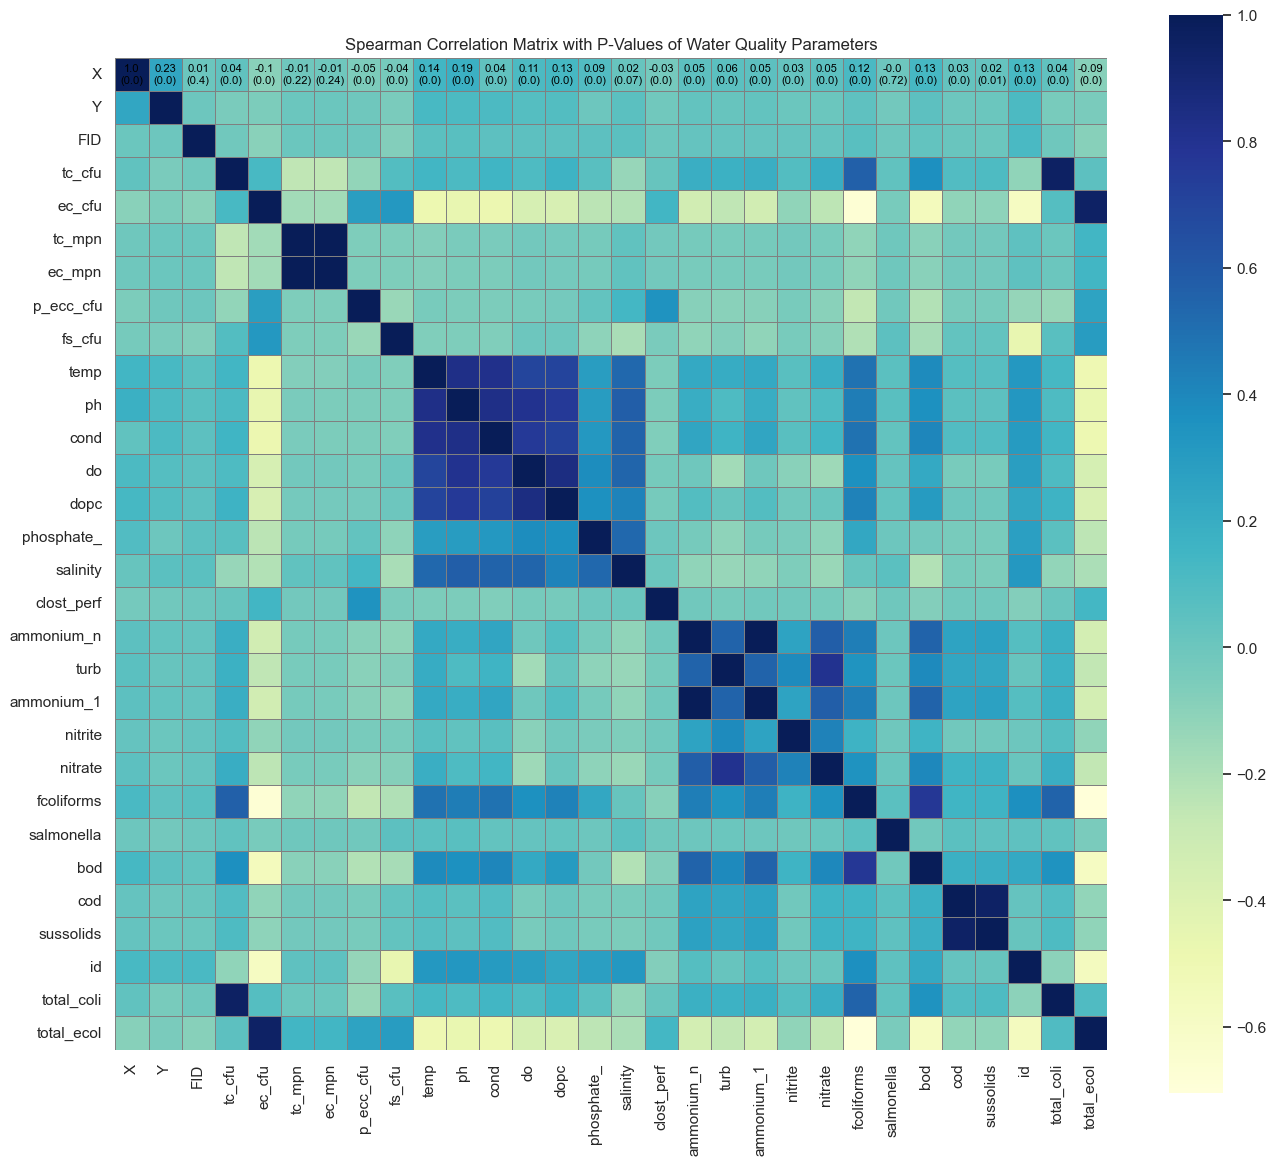

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the dataset
file_path = r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv'
data = pd.read_csv(file_path)

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
correlation_matrix = numeric_data.corr(method='spearman')

# Calculate p-values
def spearman_pval(x, y):
    return spearmanr(x, y)[1]

p_values = numeric_data.corr(method=lambda x, y: spearman_pval(x, y)) - np.eye(*correlation_matrix.shape)

# Print the correlation matrix and p-values
print("Spearman Correlation Matrix:\n", correlation_matrix)
print("\nP-Values:\n", p_values)

# Annotate the correlation matrix with p-values
annot_matrix = correlation_matrix.round(2).astype(str) + "\n(" + p_values.round(2).astype(str) + ")"

# Plot combined heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=annot_matrix, fmt='', cmap='YlGnBu', cbar=True, square=True, linewidths=0.5, linecolor='gray', annot_kws={"size": 8, "color": 'black'})
plt.title('Spearman Correlation Matrix with P-Values of Water Quality Parameters')
plt.show()

#### Interpretation of Spearman Correlation Matrix

###### High Positive Correlations (r > 0.5)

Temperature (temp) and pH (ph)
Correlation Coefficient: 0.83
P-Value: 0.0 (highly significant)
#### Interpretation: 
There is a strong positive correlation between temperature and pH. As the temperature increases, the pH level also tends to increase. This relationship is statistically significant and indicates that thermal changes in water could impact its acidity or alkalinity.

Ammonium (ammonium_n) and Nitrate (nitrate)
Correlation Coefficient: 0.57
P-Value: 0.0 (highly significant)
Interpretation: A moderate positive correlation exists between ammonium and nitrate levels, suggesting that both compounds tend to increase together. This could indicate a common source or process affecting both parameters, such as agricultural runoff or wastewater discharge.

##### High Negative Correlations (r < -0.5)
Temperature (temp) and E. coli (ec_cfu)
Correlation Coefficient: -0.50
P-Value: 0.0 (highly significant)
Interpretation: There is a moderate negative correlation between temperature and E. coli concentrations, indicating that higher temperatures are associated with lower levels of E. coli. This relationship is statistically significant and could be due to the sensitivity of E. coli to temperature changes, potentially affecting their survival rates.
Fecal Coliforms (fcoliforms) and E. coli (ec_cfu)

Correlation Coefficient: -0.68
P-Value: 0.0 (highly significant)
Interpretation: A strong negative correlation is observed between fecal coliforms and E. coli, suggesting that higher levels of fecal coliforms are associated with lower levels of E. coli. This significant relationship might indicate competitive interactions or different sources affecting their presence in water.

##### Moderate Correlations (0.3 < |r| < 0.5)
Dissolved Oxygen (do) and Conductivity (cond)
Correlation Coefficient: -0.36
P-Value: 0.0 (highly significant)
Interpretation: There is a moderate negative correlation between dissolved oxygen and conductivity. Higher conductivity tends to be associated with lower dissolved oxygen levels, which could indicate that higher ion concentrations in water (leading to higher conductivity) may affect the solubility or availability of oxygen.

##### Low Correlations (|r| < 0.3)
Total Coliforms (total_coli) and E. coli (total_ecol)
Correlation Coefficient: 0.10
P-Value: 1.71e-26 (highly significant)
Interpretation: While the correlation coefficient is low, the relationship between total coliforms and E. coli is statistically significant. This indicates a slight positive correlation, suggesting that areas with higher total coliform counts may also have slightly higher E. coli levels, even though the effect size is small.
General Observations

##### Negative Correlations: Highlight possible inverse relationships, such as between temperature and E. coli, which can be crucial for understanding seasonal or environmental impacts on water quality.
Positive Correlations: Indicate direct relationships, like between temperature and pH, which can help in predicting one parameter based on the other.
Statistically Significant Results: Highlight areas where management or further research might be necessary to understand the causes and implications of these correlations.

# Step 5: Distribution Analysis and Outlier Detection

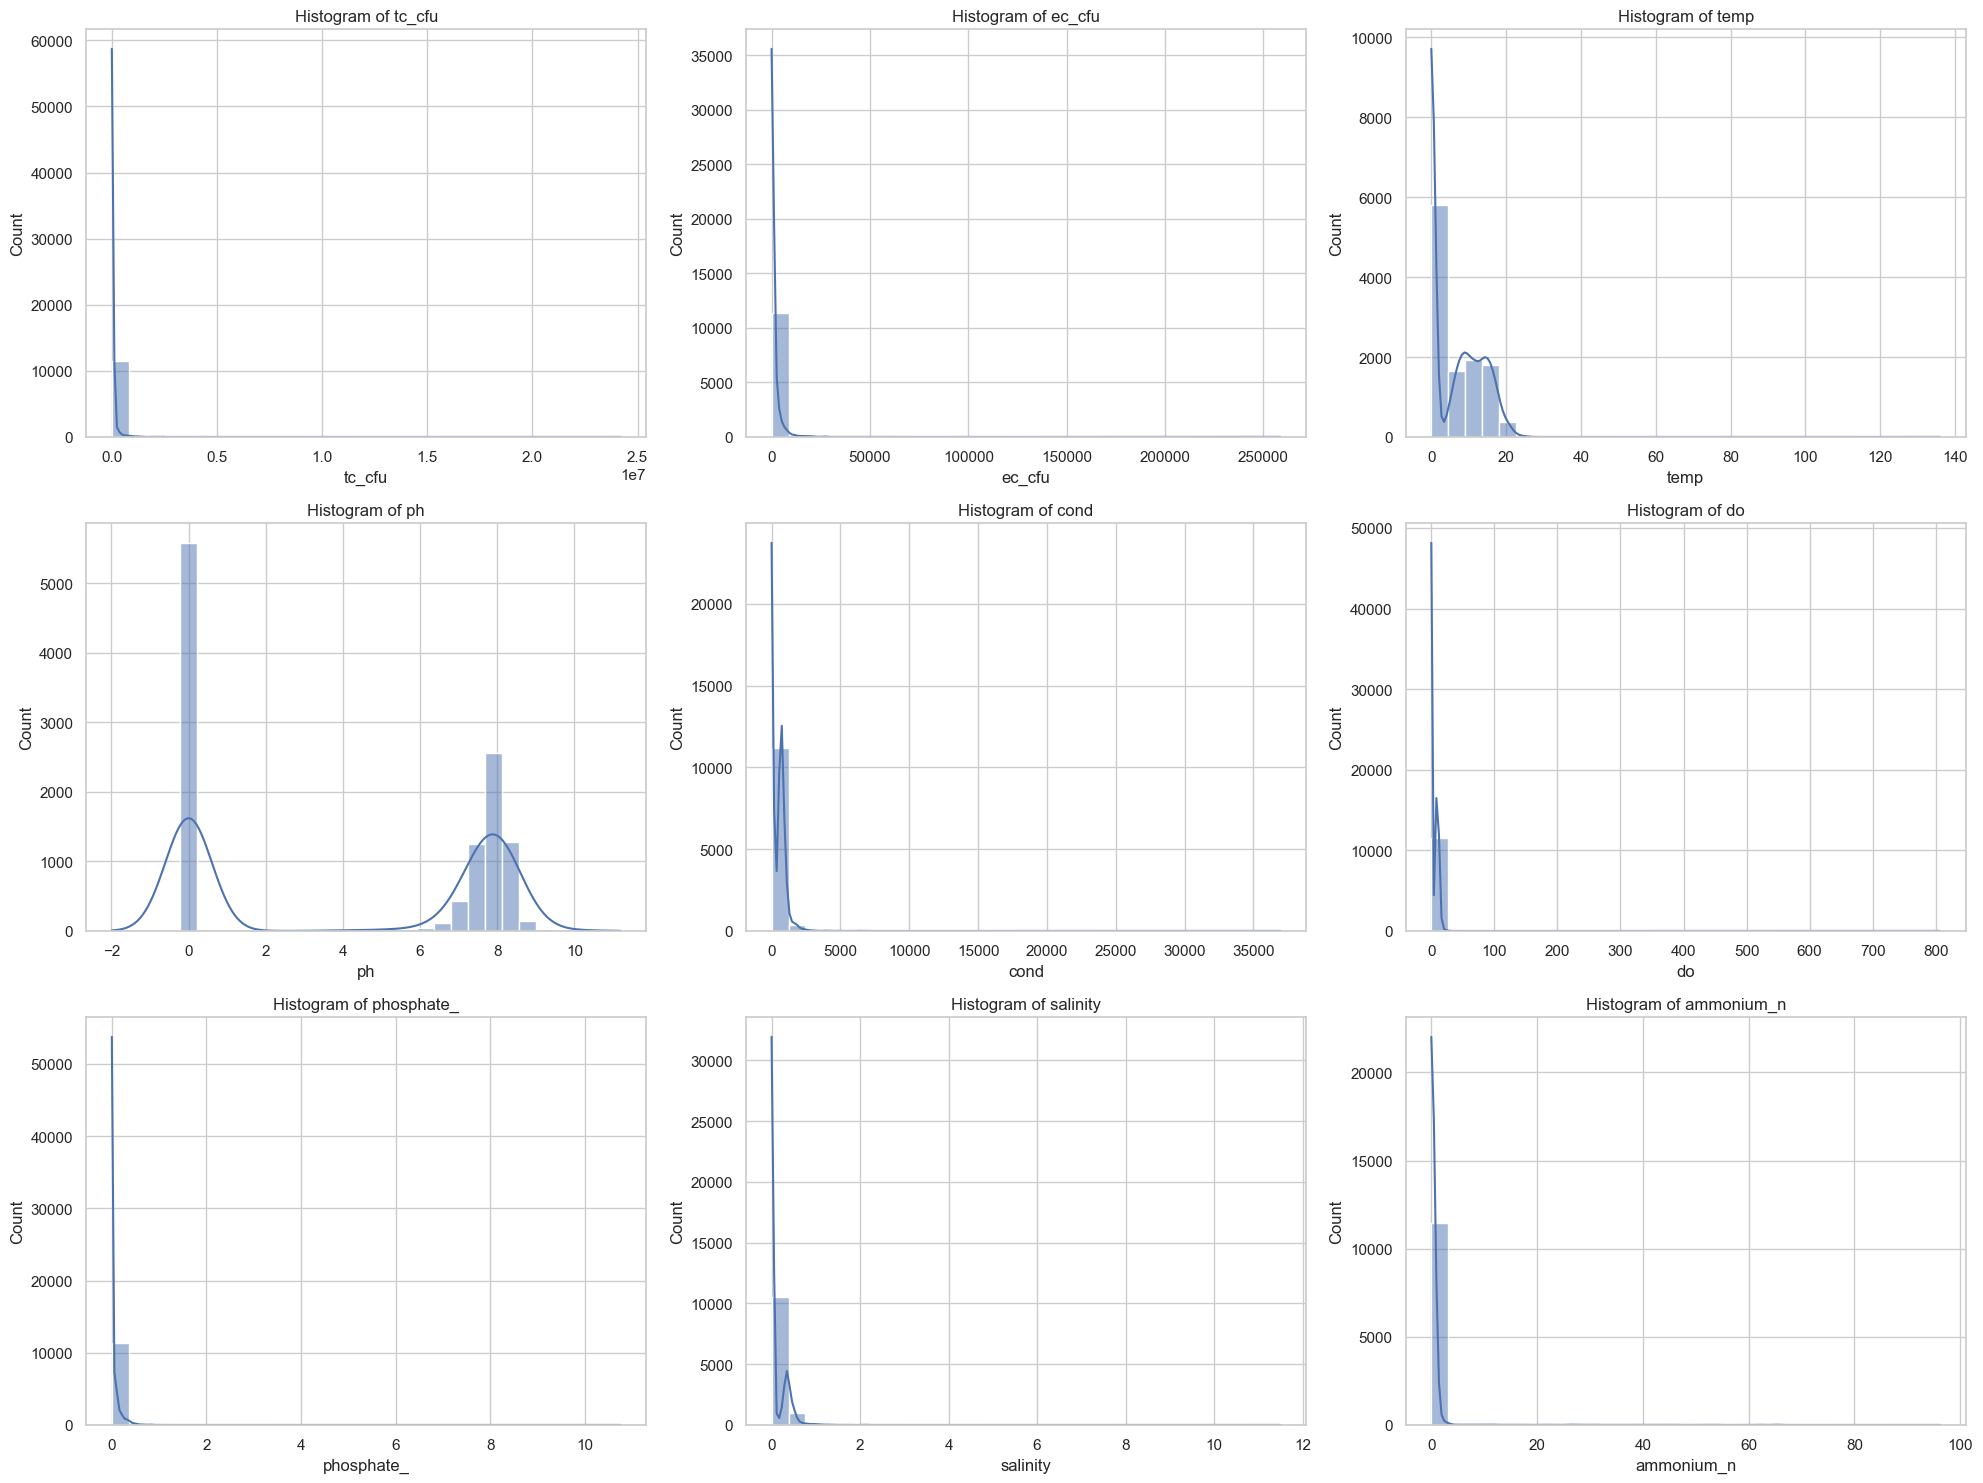

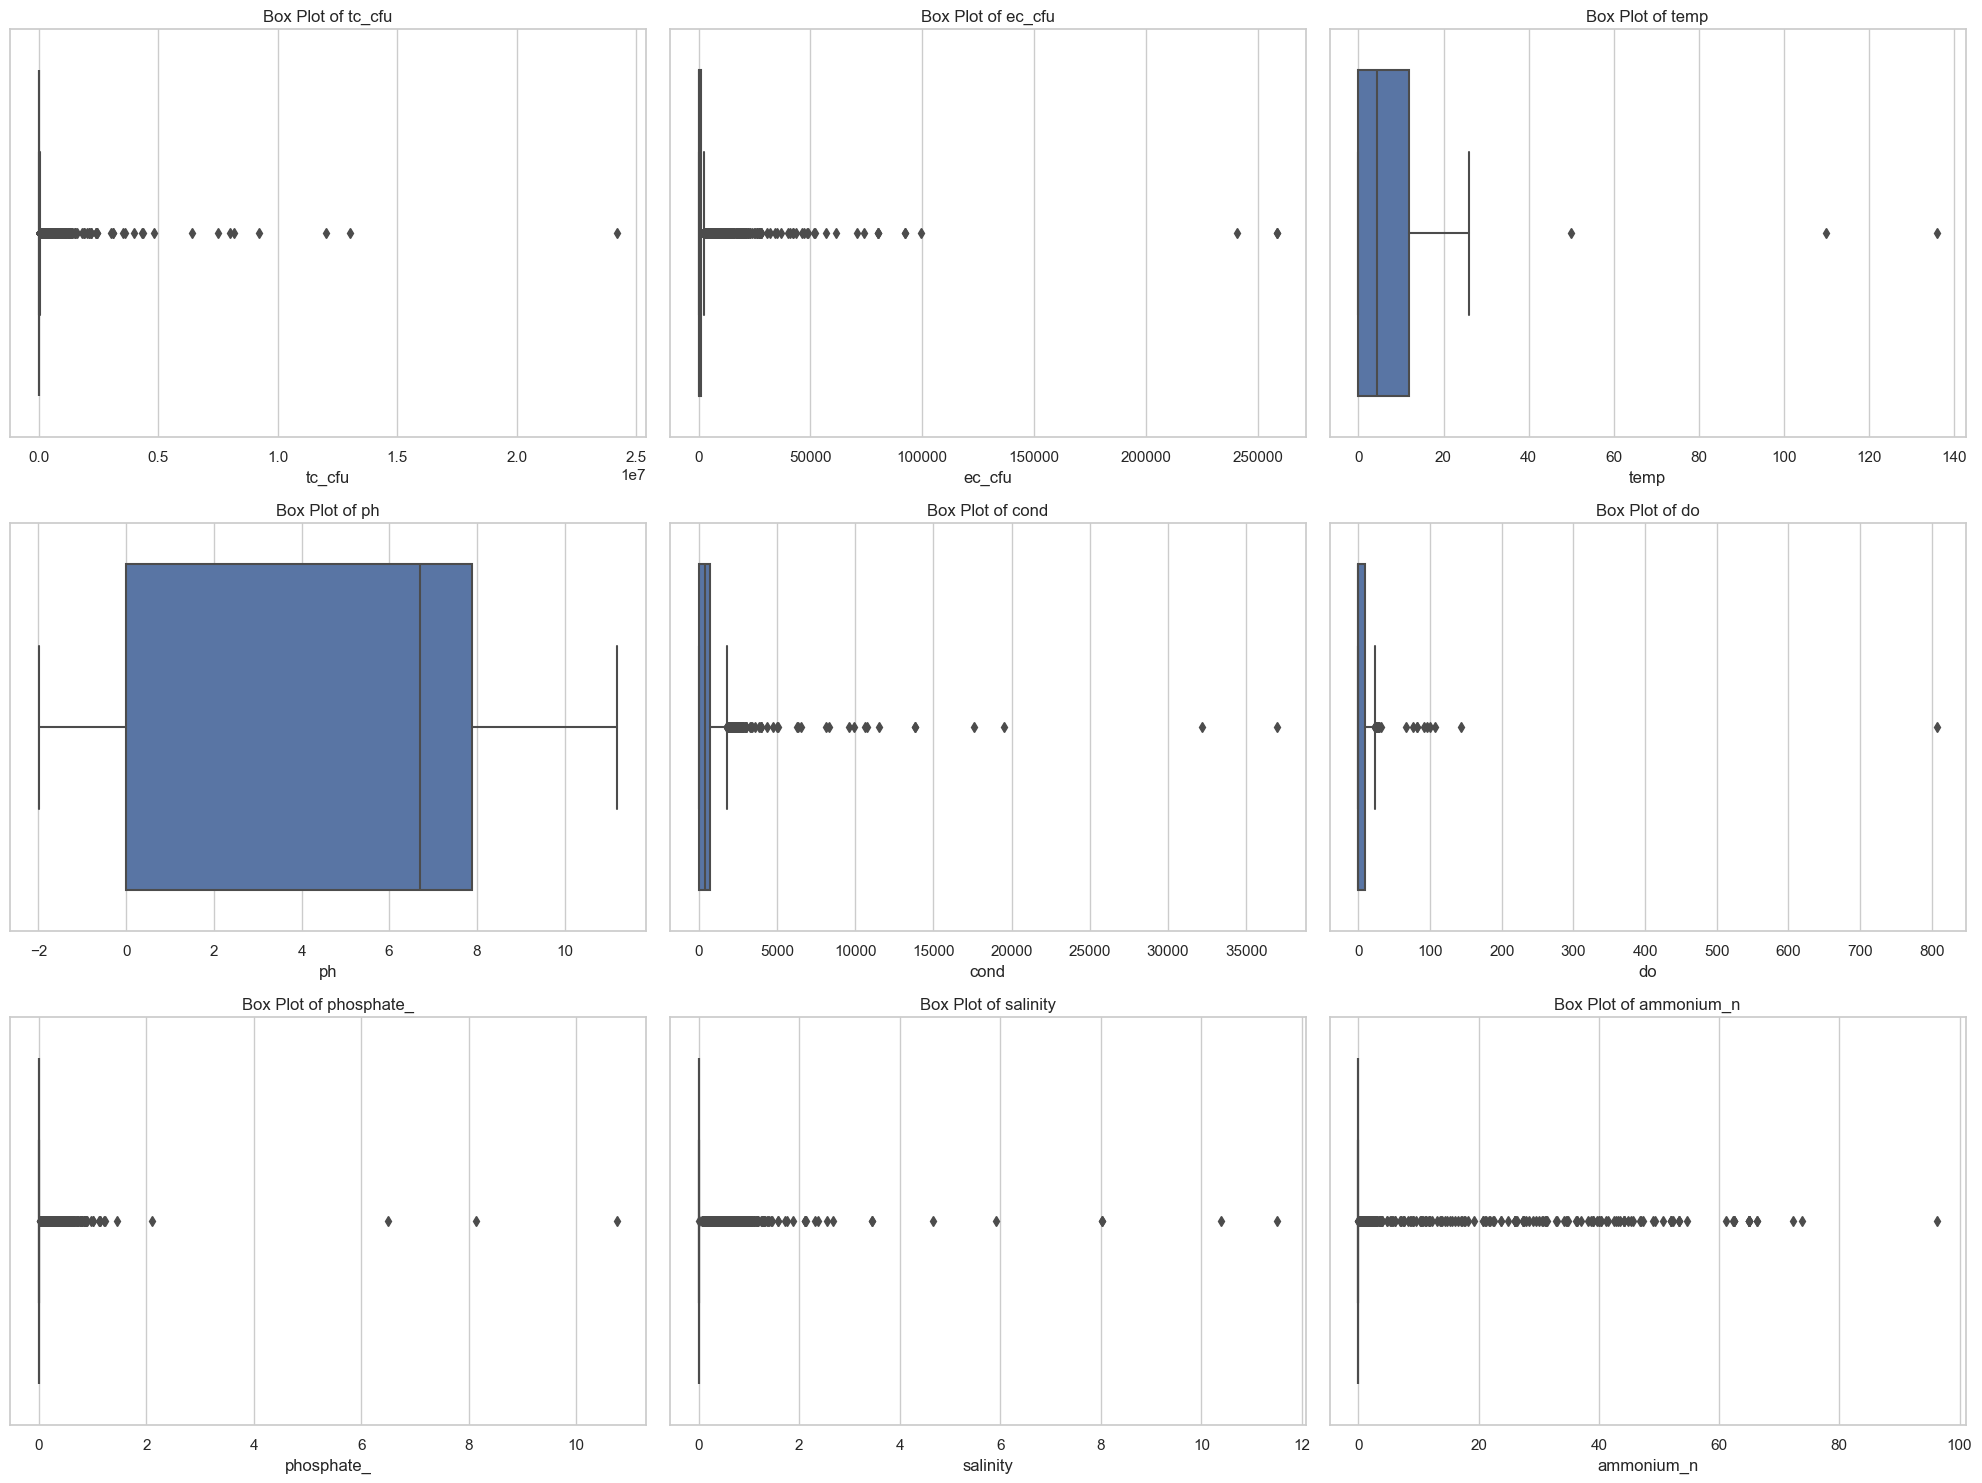

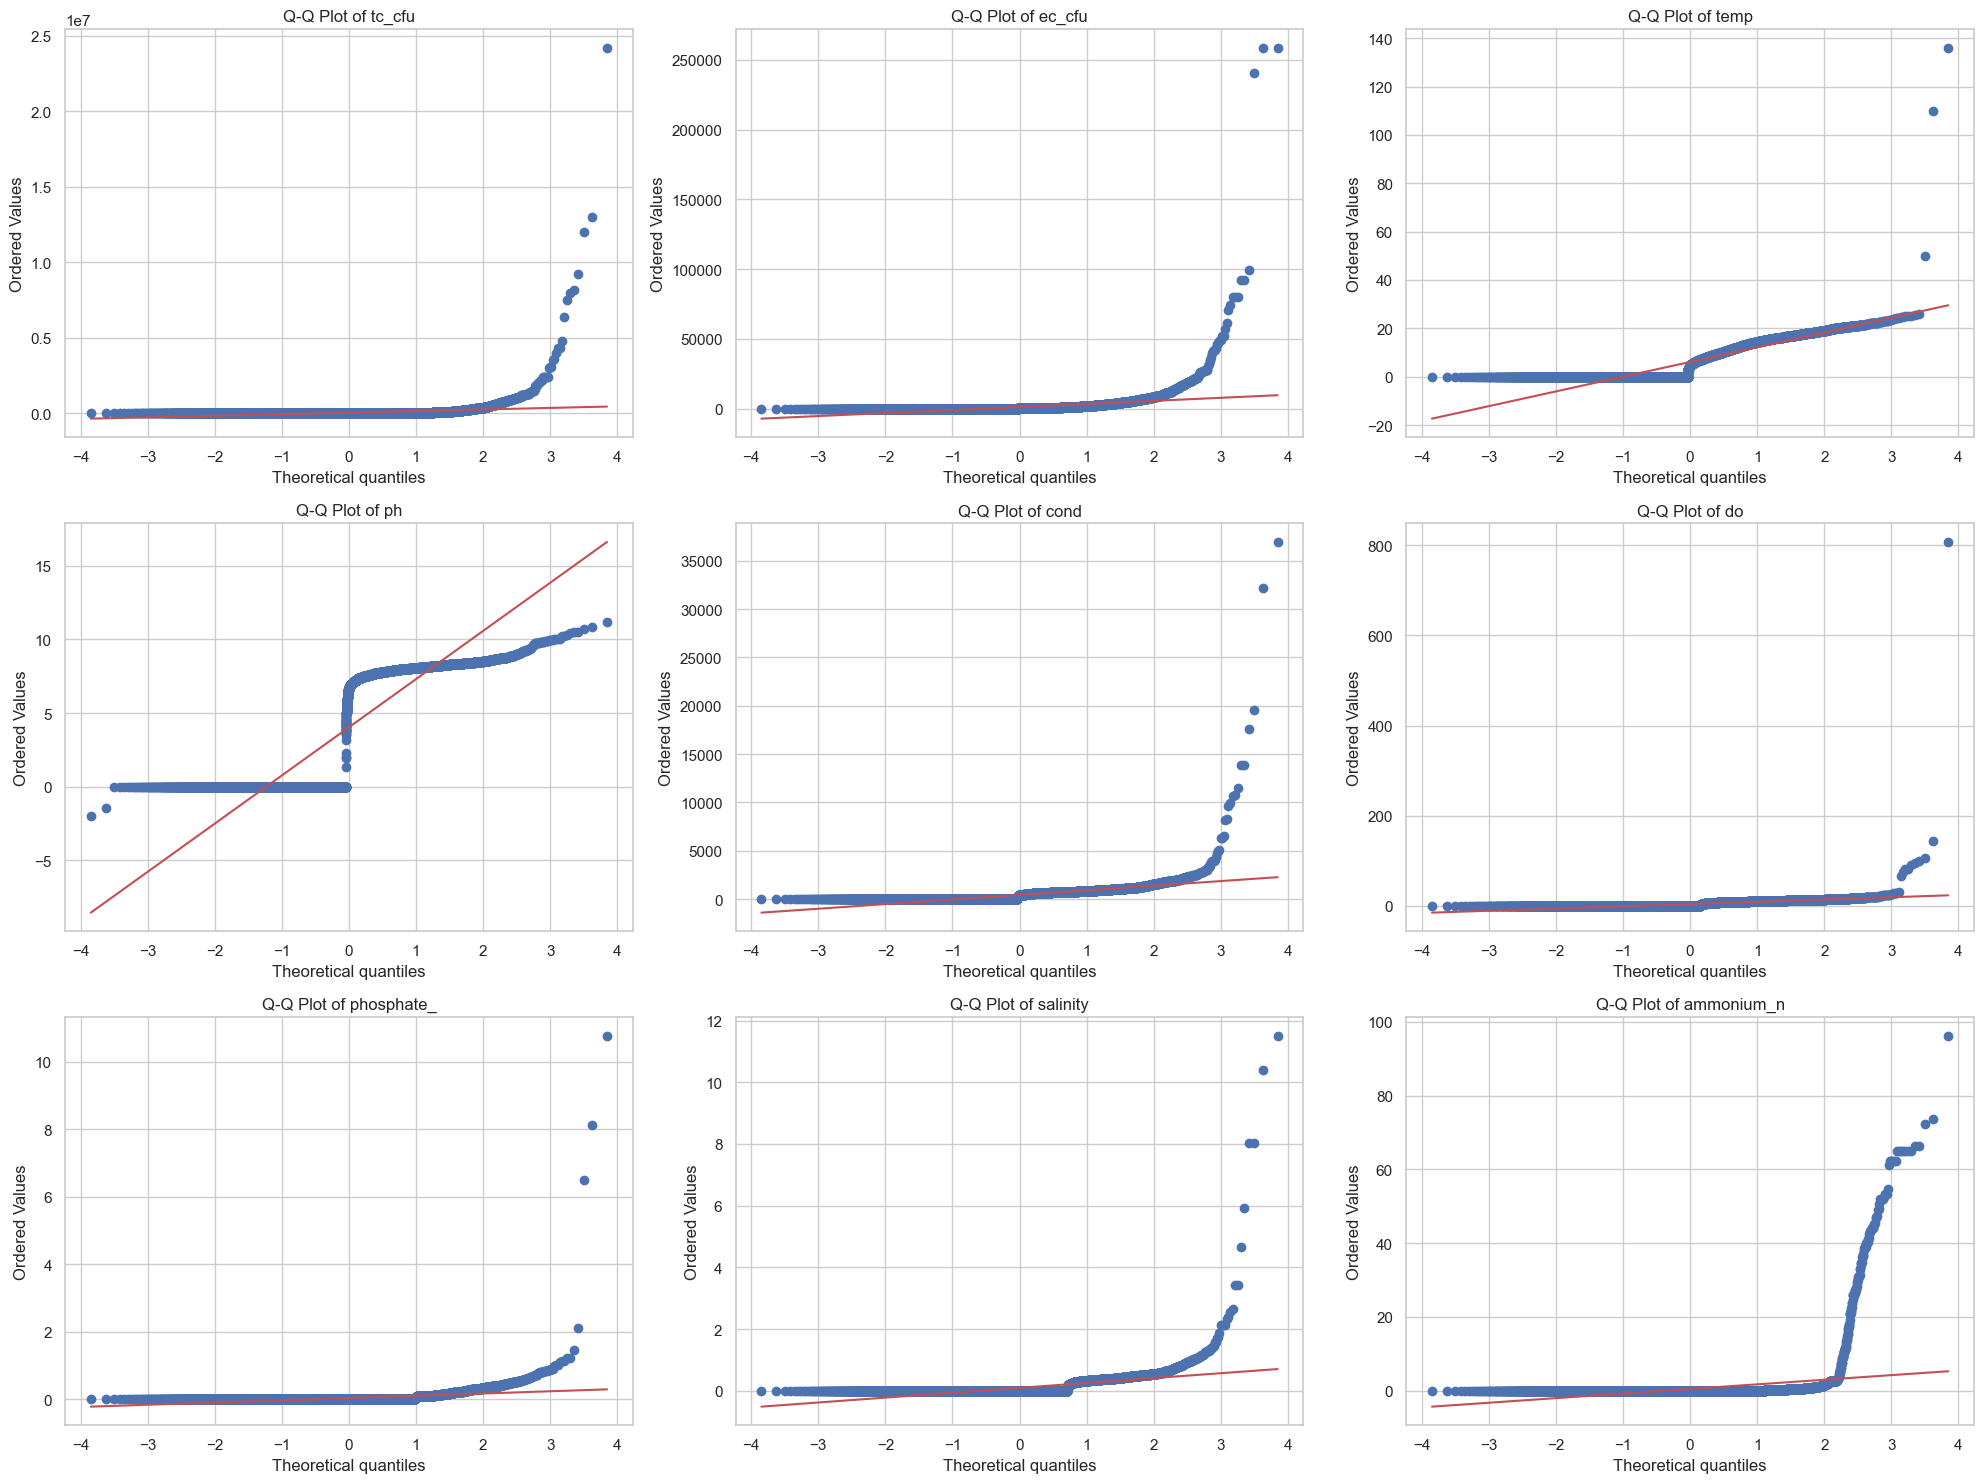

Outliers for tc_cfu:
12       201000
14       201000
21       201000
34       195000
38       242000
          ...  
11557     48000
11570    180000
11574     78000
11578     86000
11585    160000
Name: tc_cfu, Length: 1455, dtype: int64


Outliers for ec_cfu:
70        3873
78        8860
82        4611
85        4564
90       20924
         ...  
11171    19400
11176     3010
11191    20000
11201     3000
11202     3900
Name: ec_cfu, Length: 1511, dtype: int64


Outliers for temp:
1559    110.0
3334     50.0
3448    136.0
Name: temp, dtype: float64


Outliers for ph:
Series([], Name: ph, dtype: float64)


Outliers for cond:
424      1930.0
452      1860.0
476      1890.0
477      1830.0
494      1890.5
          ...  
11492    9900.1
11495    2127.5
11531    2708.5
11534    2094.7
11560    2118.7
Name: cond, Length: 155, dtype: float64


Outliers for do:
676      143.70
677      106.20
818       99.40
1898      23.81
2127      30.75
3986      66.60
4833      27.87
4838      28.54
520

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
file_path = r'C:\Users\FIONA\Desktop\Dissertation\Surface_Water_Quality.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Select key water quality parameters for analysis
key_parameters = ['tc_cfu', 'ec_cfu', 'temp', 'ph', 'cond', 'do', 'phosphate_', 'salinity', 'ammonium_n']

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(20, 15))
for i, param in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[param], kde=True, bins=30)
    plt.title(f'Histogram of {param}')
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(20, 15))
for i, param in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[param])
    plt.title(f'Box Plot of {param}')
plt.tight_layout()
plt.show()

# Plot Q-Q plots
plt.figure(figsize=(20, 15))
for i, param in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    stats.probplot(data[param].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {param}')
plt.tight_layout()
plt.show()

# Detect outliers using the IQR method
outliers = {}
for param in key_parameters:
    Q1 = data[param].quantile(0.25)
    Q3 = data[param].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[param] = data[(data[param] < lower_bound) | (data[param] > upper_bound)][param]

# Display outliers
for param, outlier_data in outliers.items():
    print(f'Outliers for {param}:')
    print(outlier_data)
    print('\n')


Interpretation of Results and Implications

Histograms
Histograms display the frequency distribution of the data, providing insight into the spread and central tendency of each parameter. Below are the interpretations and implications for each key parameter:

Total Coliforms (CFU):

Observation: Right-skewed distribution with most values at the lower end and a long tail towards higher values.
Implications: Indicates that water samples generally have low coliform counts, but there are occasional spikes. These spikes could be due to specific pollution events, such as sewage discharge or agricultural runoff, which introduce high levels of coliform bacteria into the water.

E. Coli (CFU):
Observation: Similar right-skewed distribution with a few high outliers.
Implications: Suggests occasional contamination events leading to high E. Coli levels. Potential causes could include fecal contamination from wildlife, livestock, or malfunctioning septic systems.

Temperature:
Observation: Most values are clustered around the lower range with some very high outliers.
Implications: The high outliers might be due to industrial discharges or hot weather conditions affecting certain areas. Elevated temperatures can impact aquatic life, reduce dissolved oxygen levels, and increase the toxicity of certain pollutants.

pH:
Observation: Bimodal distribution with two distinct peaks.
Implications: This bimodal pattern suggests different water sources or conditions influencing the pH levels. One peak may represent natural conditions, while the other could indicate areas affected by industrial discharges, acid rain, or agricultural runoff.

Conductivity:
Observation: Low values with a few high outliers.
Implications: High conductivity outliers might be due to pollution from salts, heavy metals, or other dissolved solids. These could originate from industrial effluents, road salt runoff, or wastewater discharges.

Dissolved Oxygen:
Observation: Predominantly low values with a few high values.
Implications: Low dissolved oxygen levels can be detrimental to aquatic life and may indicate organic pollution, which consumes oxygen during decomposition. High values might result from aeration or the presence of algae producing oxygen during photosynthesis.

Phosphate as P:
Observation: Mostly low values with some high outliers.
Implications: High phosphate levels often result from agricultural runoff, detergents, and sewage effluent. Excessive phosphate can lead to eutrophication, causing algal blooms and oxygen depletion.

Salinity:
Observation: Low values with a few high outliers.
Implications: Generally, freshwater conditions prevail, but occasional high salinity levels suggest saltwater intrusion or pollution from de-icing salts or industrial processes.

Ammonium as NH4:
Observation: Right-skewed distribution with low values and occasional high readings.
Implications: High ammonium levels can indicate pollution from fertilizers, sewage, or animal waste. Ammonium is toxic to aquatic life at high concentrations and can affect water quality.

Box Plots

Box Plots help identify outliers and the spread of the data.

Total Coliforms (CFU):
Observation: Numerous outliers beyond the upper whisker.
Implications: Confirms significant variability and potential contamination sources, indicating frequent pollution events.

E. Coli (CFU):
Observation: Several outliers present.
Implications: Occasional spikes in E. Coli levels, likely due to specific pollution incidents.

Temperature:
Observation: Clear high outliers.
Implications: Rare but extreme temperature events possibly due to industrial discharge or environmental conditions like heatwaves.

pH:
Observation: Few outliers, large interquartile range.
Implications: Varying pH levels but within a reasonable range, indicating different water sources or conditions.

Conductivity:
Observation: Many high-end outliers.
Implications: Occasional instances of high ionic content due to pollution or saltwater mixing.

Dissolved Oxygen:
Observation: High variability with significant outliers.
Implications: Indicates general low dissolved oxygen levels with occasional high readings, possibly due to algae blooms or aeration events.

Phosphate as P:
Observation: Many high-value outliers.
Implications: Suggests infrequent but significant phosphate pollution events, likely from agricultural runoff or sewage discharges.

Salinity:
Observation: Several outliers.
Implications: Indicates that freshwater conditions generally prevail with occasional saltwater intrusion or pollution from salts.

Ammonium as NH4:
Observation: Many high-value outliers.
Implications: Indicates that ammonium levels are generally low but can spike significantly due to pollution from fertilizers, sewage, or animal waste.

Q-Q Plots
Q-Q Plots compare the data distribution to a normal distribution, identifying deviations.

Total Coliforms (CFU):
Observation: Significant deviation from normality, especially at high values.
Implications: Indicates non-normal distribution with many high outliers, suggesting frequent contamination events.

E. Coli (CFU):
Observation: Deviates from normal distribution with high-end outliers.
Implications: Confirms the presence of extreme values, indicating occasional high contamination.

Temperature:
Observation: Clear deviation at high values.
Implications: Indicates non-normal distribution with some extreme temperature readings, possibly due to industrial activities or environmental conditions.

pH:
Observation: Multiple deviations indicating a bimodal distribution.
Implications: Suggests two different conditions or sources affecting pH levels, possibly natural versus polluted water sources.

Conductivity:
Observation: Major deviations at the high end.
Implications: Indicates non-normal distribution with significant outliers, reflecting pollution events or saltwater mixing.

Dissolved Oxygen:
Observation: Deviations indicating variability and outliers.
Implications: Suggests occasional high dissolved oxygen levels, possibly from aeration or algae activity.

Phosphate as P:
Observation: Significant deviations with outliers.
Implications: Confirms the presence of high phosphate values, indicating pollution events.

Salinity:
Observation: Significant deviations at the high end.
Implications: Indicates occasional high salinity events, possibly due to saltwater intrusion or pollution.

Ammonium as NH4:
Observation: Large deviations at high values.
Implications: Suggests non-normal distribution with many high outliers, indicating pollution from fertilizers, sewage, or animal waste.

Key Findings and Implications
High Variability and Outliers: Many water quality parameters exhibit high variability with numerous outliers. This suggests frequent pollution events or environmental changes affecting water quality.
Potential Pollution Sources: Outliers in coliform counts, E. Coli, phosphate, and ammonium levels indicate possible sources of pollution, such as agricultural runoff, sewage discharges, and industrial activities.
Environmental Conditions: High temperatures, variable pH levels, and occasional high dissolved oxygen readings suggest environmental factors like industrial discharges, weather conditions, and biological activity affecting water quality.
Need for Further Investigation: The identified outliers and skewed distributions highlight the need for further investigation to determine the causes and address potential pollution sources.

# Step 6: Compliance Analysis with Environmental Standards


Compliance Rates (%):
 compliant_tc_cfu        67.155678
compliant_ec_cfu        67.578530
compliant_temp          99.939593
compliant_ph            49.853297
compliant_cond          42.923714
compliant_turb          99.922333
compliant_do            41.732827
compliant_phosphate_    89.817052
dtype: float64


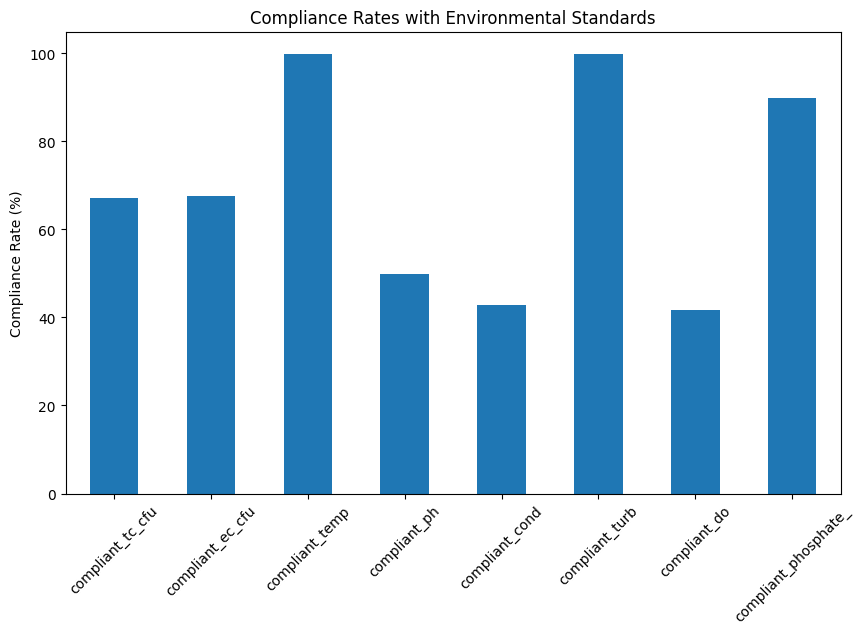

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'C:\\Users\\FIONA\\Desktop\\Dissertation\\Surface_Water_Quality.csv'
data = pd.read_csv(file_path)

# Define standards
standards = {
    'tc_cfu': 10000,
    'ec_cfu': 500,
    'temp': 25,
    'ph_min': 6.5,
    'ph_max': 9.0,
    'cond_min': 300,
    'cond_max': 1000,
    'turb': 500,
    'do': 5,
    'phosphate_': 0.1
}

# Create binary compliance variables
data['compliant_tc_cfu'] = data['tc_cfu'] <= standards['tc_cfu']
data['compliant_ec_cfu'] = data['ec_cfu'] <= standards['ec_cfu']
data['compliant_temp'] = data['temp'] <= standards['temp']
data['compliant_ph'] = (data['ph'] >= standards['ph_min']) & (data['ph'] <= standards['ph_max'])
data['compliant_cond'] = (data['cond'] >= standards['cond_min']) & (data['cond'] <= standards['cond_max'])
data['compliant_turb'] = data['turb'] <= standards['turb']
data['compliant_do'] = data['do'] >= standards['do']
data['compliant_phosphate_'] = data['phosphate_'] <= standards['phosphate_']

# Calculate compliance rates
compliance_rates = data[['compliant_tc_cfu', 'compliant_ec_cfu', 'compliant_temp', 'compliant_ph', 'compliant_cond', 'compliant_turb', 'compliant_do', 'compliant_phosphate_']].mean() * 100

# Print compliance rates
print("Compliance Rates (%):\n", compliance_rates)

# Visualize compliance rates
import matplotlib.pyplot as plt
compliance_rates.plot(kind='bar', figsize=(10, 6))
plt.title('Compliance Rates with Environmental Standards')
plt.ylabel('Compliance Rate (%)')
plt.xticks(rotation=45)
plt.show()


Compliance Analysis Interpretation:
Total Coliforms (CFU):

Compliance Rate: 67.16%
Standard: 10,000 per 100 ml (Mandatory)
Interpretation: Approximately 67% of samples meet the mandatory standard, indicating moderate compliance but room for improvement.
E. Coli (CFU):

Compliance Rate: 67.58%
Standard: ≤900 cfu/100ml (Sufficient)
Interpretation: Similar to Total Coliforms, about 67.6% of samples meet the standard, suggesting moderate compliance.
Temperature:

Compliance Rate: 99.94%
Standard: 0 - 25°C
Interpretation: Almost all samples are within the acceptable temperature range, indicating excellent compliance.
pH:

Compliance Rate: 49.85%
Standard: 6.5 to 9.0
Interpretation: Only about half of the samples meet the pH standard, indicating significant non-compliance and potential issues with acidity or alkalinity in the water.
Conductivity:

Compliance Rate: 42.92%
Standard: 300 to 1000 µS/cm
Interpretation: Less than half of the samples meet the conductivity standard, suggesting considerable deviation likely influenced by geological factors.
Turbidity:

Compliance Rate: 99.92%
Standard: ≤ 500 NTU
Interpretation: Nearly all samples are within the acceptable turbidity range, indicating excellent compliance.
Dissolved Oxygen (DO):

Compliance Rate: 41.73%
Standard: ≥5 mg/l
Interpretation: Less than half of the samples meet the DO standard, indicating poor oxygenation which can adversely affect aquatic life.
Phosphate:

Compliance Rate: 89.82%
Standard: ≤0.1 mg/l
Interpretation: A high compliance rate indicates that most samples are within the acceptable phosphate concentration, suggesting limited nutrient pollution.